### Data Loading and Initial **Inspection**

In [ ]:
import pandas as pd
import numpy as np

#Download dataset
! gdown 1mo-S_eZUfSl-RzD-PabmQxI4CNPpF8zo

# Use pd.read_excel to read the .xlsx file without a header
df = pd.read_excel('/content/featured_attendance_data.xlsx', header=None)

# Naming the columns
desired_feature_names = ['Subject', 'year', 'Batch_Number', 'Day_of_Week', 'Time_of_Day', 'No_of_classes_per_day', 'Attendance_Percentage', 'Prev_Subject_Attendance', 'Rolling_Subject_Attendance_3', 'Subject_Attendance_Trend', 'Next_day_holiday', 'Event_on_that_day']
df.columns = desired_feature_names

# Explicitly drop the first row as requested by the user, without resetting index immediately
df = df.drop([0,1])
df = df.reset_index(drop=True)


df.head(5)

Downloading...
From: https://drive.google.com/uc?id=1mo-S_eZUfSl-RzD-PabmQxI4CNPpF8zo
To: /content/featured_attendance_data.xlsx
100% 43.7k/43.7k [00:00<00:00, 75.3MB/s]


,Subject,year,Batch_Number,Day_of_Week,Time_of_Day,No_of_classes_per_day,Attendance_Percentage,Prev_Subject_Attendance,Rolling_Subject_Attendance_3,Subject_Attendance_Trend,Next_day_holiday,Event_on_that_day
0,Core_CS,2028,B1,Mon,Evening,2,87.1,78.854099,87.1,0,N,no
1,Core_CS,2028,B1,Wed,Evening,2,90.32,87.1,88.71,11.656552,N,no
2,Core_CS,2028,B1,Tue,Evening,2,83.41,90.32,86.943333,14.876552,Y,yes
3,Core_CS,2028,B1,Thu,Evening,1,86.64,83.41,86.79,7.966552,N,no
4,Core_CS,2028,B1,Fri,Evening,2,85.71,86.64,85.253333,11.196552,N,no


### Data Cleaning and Preprocessing

**NOTED** : That all the columns in my dataset are "OBJECT" in type

In [ ]:
df.select_dtypes(include='object').head()

,Subject,year,Batch_Number,Day_of_Week,Time_of_Day,No_of_classes_per_day,Attendance_Percentage,Prev_Subject_Attendance,Rolling_Subject_Attendance_3,Subject_Attendance_Trend,Next_day_holiday,Event_on_that_day
0,Core_CS,2028,B1,Mon,Evening,2,87.1,78.854099,87.1,0,N,no
1,Core_CS,2028,B1,Wed,Evening,2,90.32,87.1,88.71,11.656552,N,no
2,Core_CS,2028,B1,Tue,Evening,2,83.41,90.32,86.943333,14.876552,Y,yes
3,Core_CS,2028,B1,Thu,Evening,1,86.64,83.41,86.79,7.966552,N,no
4,Core_CS,2028,B1,Fri,Evening,2,85.71,86.64,85.253333,11.196552,N,no


In [ ]:
df.dtypes


,0
Subject,object
year,object
Batch_Number,object
Day_of_Week,object
Time_of_Day,object
No_of_classes_per_day,object
Attendance_Percentage,object
Prev_Subject_Attendance,object
Rolling_Subject_Attendance_3,object
Subject_Attendance_Trend,object


### One-Hot Encoding for Categorical Features

In [ ]:
print(df['Subject'].unique())
df['Subject'].value_counts()
# one-hot encoding

['Core_CS' 'DataAI' 'Foundations' 'WebDev']


,count
Subject,
Core_CS,242
Foundations,141
WebDev,110
DataAI,88


In [ ]:
print(df['year'].unique())
df['year'].value_counts()
# one-hot encoding
# we will not covert it to integer datatype

[2028 2027 2029]


,count
year,
2028,285
2029,225
2027,71


In [ ]:
print(df['Batch_Number'].unique())
df['Batch_Number'].value_counts()

# one-hot encoding

['B1' 'B2' 'B3' 'B4' 'B5']


,count
Batch_Number,
B1,265
B2,196
B3,68
B4,36
B5,16


In [ ]:
print(df['Day_of_Week'].unique())
df['Day_of_Week'].value_counts()
# one-hot encoding

['Mon' 'Wed' 'Tue' 'Thu' 'Fri' 'Sat' 'Sun']


,count
Day_of_Week,
Mon,127
Tue,120
Wed,118
Thu,101
Fri,89
Sat,13
Sun,13


In [ ]:
print(df['Time_of_Day'].unique())
print()
print(df['Time_of_Day'].value_counts())

# binary encoding (1 or 0)
df['Time_of_Day'] = df['Time_of_Day'].map({'Morning': 1, 'Evening': 0 })

['Evening' 'Morning']

Time_of_Day
Evening    306
Morning    275
Name: count, dtype: int64


In [ ]:
print(df['No_of_classes_per_day'].unique())
df['No_of_classes_per_day'].value_counts()
# Label-encoding


[2 1 3]


,count
No_of_classes_per_day,
2,299
1,227
3,55


In [ ]:
# Convert the 'No_of_classes_per_day' column to numeric
df['No_of_classes_per_day'] = pd.to_numeric(df['No_of_classes_per_day'])

In [ ]:
df['Attendance_Percentage'].value_counts().head()
# target variable


,count
Attendance_Percentage,
96.39,9
94.85,9
92.78,7
97.42,7
82.71,7


In [ ]:
# Convert the 'Attendance_Percentage' column to numeric
df['Attendance_Percentage'] = pd.to_numeric(df['Attendance_Percentage'])

In [ ]:
# Convert the 'Prev_Subject_Attendance' column to numeric
df['Prev_Subject_Attendance'] = pd.to_numeric(df['Prev_Subject_Attendance'])

In [ ]:
# Convert the 'Rolling_Subject_Attendance_3' column to numeric
df['Rolling_Subject_Attendance_3'] = pd.to_numeric(df['Rolling_Subject_Attendance_3'])

In [ ]:
# Convert the 'Subject_Attendance_Trend' column to numeric
df['Subject_Attendance_Trend'] = pd.to_numeric(df['Subject_Attendance_Trend'])

In [ ]:
df.dtypes
#all the datatypes are taken care off.

,0
Subject,object
year,object
Batch_Number,object
Day_of_Week,object
Time_of_Day,int64
No_of_classes_per_day,int64
Attendance_Percentage,float64
Prev_Subject_Attendance,float64
Rolling_Subject_Attendance_3,float64
Subject_Attendance_Trend,float64


In [ ]:
print(df['Next_day_holiday'].unique())
print()
print(df['Next_day_holiday'].value_counts())

# binary encoding
df['Next_day_holiday'] = df['Next_day_holiday'].map({'Y': 1, 'N': 0 , 'n': 0})

['N' 'Y' 'n']

Next_day_holiday
N    445
Y    135
n      1
Name: count, dtype: int64


In [ ]:
print(df['Event_on_that_day'].unique())
print("")
print(df['Event_on_that_day'].value_counts())

# binary encoding
df['Event_on_that_day'] = df['Event_on_that_day'].map({'yes': 1, 'no': 0})

['no' 'yes']

Event_on_that_day
no     440
yes    141
Name: count, dtype: int64


In [ ]:
df.head()

,Subject,year,Batch_Number,Day_of_Week,Time_of_Day,No_of_classes_per_day,Attendance_Percentage,Prev_Subject_Attendance,Rolling_Subject_Attendance_3,Subject_Attendance_Trend,Next_day_holiday,Event_on_that_day
0,Core_CS,2028,B1,Mon,0,2,87.10,78.854099,87.100000,0.000000,0,0
1,Core_CS,2028,B1,Wed,0,2,90.32,87.100000,88.710000,11.656552,0,0
2,Core_CS,2028,B1,Tue,0,2,83.41,90.320000,86.943333,14.876552,1,1
3,Core_CS,2028,B1,Thu,0,1,86.64,83.410000,86.790000,7.966552,0,0
4,Core_CS,2028,B1,Fri,0,2,85.71,86.640000,85.253333,11.196552,0,0


In [ ]:
# all our numerical data type columns
df.select_dtypes(include = ['int64', 'float64']).head()

,Time_of_Day,No_of_classes_per_day,Attendance_Percentage,Prev_Subject_Attendance,Rolling_Subject_Attendance_3,Subject_Attendance_Trend,Next_day_holiday,Event_on_that_day
0,0,2,87.10,78.854099,87.100000,0.000000,0,0
1,0,2,90.32,87.100000,88.710000,11.656552,0,0
2,0,2,83.41,90.320000,86.943333,14.876552,1,1
3,0,1,86.64,83.410000,86.790000,7.966552,0,0
4,0,2,85.71,86.640000,85.253333,11.196552,0,0


In [ ]:
# all our object data type columns
df.select_dtypes(include = 'object').head()

,Subject,year,Batch_Number,Day_of_Week
0,Core_CS,2028,B1,Mon
1,Core_CS,2028,B1,Wed
2,Core_CS,2028,B1,Tue
3,Core_CS,2028,B1,Thu
4,Core_CS,2028,B1,Fri


In [ ]:
# starting one-Hot encoding for non-numercial columns/features

cat =df.select_dtypes(include = 'object') # selecting the non-numercial columns/features, storing them in cat
cat_dummy = pd.get_dummies(cat, drop_first=True, dtype=int) # one-hot encoding

In [ ]:
# removing the non-numercial columns/features, before add one-hot encoding columns
df.drop(columns = cat.columns, inplace = True)

In [ ]:
df = pd.concat([df, cat_dummy], axis=1) # adding the non-numercial columns/features and dummy variable after one-hot encoding

In [ ]:
df.head()

,Time_of_Day,No_of_classes_per_day,Attendance_Percentage,Prev_Subject_Attendance,Rolling_Subject_Attendance_3,Subject_Attendance_Trend,Next_day_holiday,Event_on_that_day,Subject_DataAI,Subject_Foundations,...,Batch_Number_B2,Batch_Number_B3,Batch_Number_B4,Batch_Number_B5,Day_of_Week_Mon,Day_of_Week_Sat,Day_of_Week_Sun,Day_of_Week_Thu,Day_of_Week_Tue,Day_of_Week_Wed
0,0,2,87.10,78.854099,87.100000,0.000000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,2,90.32,87.100000,88.710000,11.656552,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2,83.41,90.320000,86.943333,14.876552,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,86.64,83.410000,86.790000,7.966552,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,2,85.71,86.640000,85.253333,11.196552,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes
# now all the datatype are in Numerical type, so we are good to go.

,0
Time_of_Day,int64
No_of_classes_per_day,int64
Attendance_Percentage,float64
Prev_Subject_Attendance,float64
Rolling_Subject_Attendance_3,float64
Subject_Attendance_Trend,float64
Next_day_holiday,int64
Event_on_that_day,int64
Subject_DataAI,int64
Subject_Foundations,int64


### Splitting Data into Training and Testing Sets

In [ ]:
X = df.drop(columns = 'Attendance_Percentage')
y =df['Attendance_Percentage']


# split the dataset in train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
num_col = ['Prev_Subject_Attendance'
, 'Rolling_Subject_Attendance_3',
'Subject_Attendance_Trend']

### Feature Scaling

In [ ]:
# we are applying techniques StandardScaler Scaling on numerical data only not whole data****

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# If we also fit on test data, we’d be “peeking” at unseen data → this causes data leakage (information from the test set leaking into training).

In [ ]:
X_train.head()

,Time_of_Day,No_of_classes_per_day,Prev_Subject_Attendance,Rolling_Subject_Attendance_3,Subject_Attendance_Trend,Next_day_holiday,Event_on_that_day,Subject_DataAI,Subject_Foundations,Subject_WebDev,...,Batch_Number_B2,Batch_Number_B3,Batch_Number_B4,Batch_Number_B5,Day_of_Week_Mon,Day_of_Week_Sat,Day_of_Week_Sun,Day_of_Week_Thu,Day_of_Week_Tue,Day_of_Week_Wed
293,1,1,-0.059179,0.164274,-0.332707,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
385,0,2,-2.293556,-2.754560,-2.037414,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
78,0,1,0.879629,0.443031,1.257860,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211,0,2,-1.294489,-1.319770,-1.137371,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
550,1,2,0.970017,1.111689,0.250301,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


### Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
lr.coef_

array([-1.55494658, -1.26934736, -0.58986357, 13.78495563, -2.61552912,
       -0.76350978, -1.86859132,  3.09984124, -2.38883122, -2.6279229 ,
        9.65577731, 18.26224472, -2.99561333, -8.9444279 , -8.29444902,
       -8.70948351,  0.16286364,  1.39055173, -4.93471083,  2.77728814,
        1.58988437,  0.83120116])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(mse)
print(mae)

49.03002716936031
4.872577501220657


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)



0.8142948047751938

In [ ]:
X_train.shape

(464, 22)

🔴 Red dashed line → perfect predictions (ideal line where predicted = actual).

🔵 Blue dots → your model’s real predictions.

- The closer dots are to the red line, the better the model.

- If dots deviate or form patterns, the model has bias or errors.

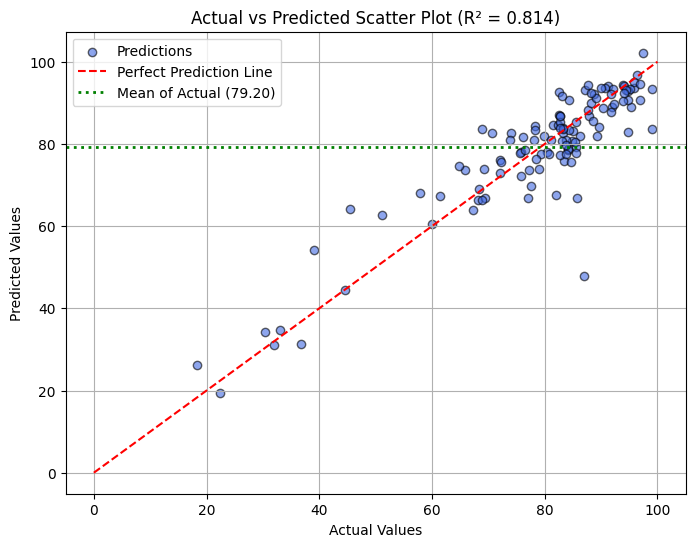

In [ ]:
import matplotlib.pyplot as plt


r2 = r2_score(y_test, y_pred)
mean_actual = np.mean(y_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.6, edgecolor='k', label='Predictions')
plt.plot([0, 100], [0, 100], 'r--', label='Perfect Prediction Line')

plt.axhline(y=mean_actual, color='green', linestyle=':', linewidth=2, label=f'Mean of Actual ({mean_actual:.2f})')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Scatter Plot (R² = {r2:.3f})')
plt.legend()
plt.grid(True)
plt.show()


### Feature Engineering

In [ ]:
from sklearn.feature_selection import RFE
rfe= RFE(lr, n_features_to_select=12)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=12)

In [ ]:
selected_features = X_train.columns[rfe.support_]
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

print()
print("~ Selected features via RFE: {Boolean Mask}")
print()
print(rfe.support_) # boolean mask of selected features from X_trian
print("-" * 50)

print("~ Selected features via RFE:")
print()
print(selected_features)



~ Selected features via RFE: {Boolean Mask}

[False False False  True  True False False  True  True  True  True  True
  True  True  True  True False False  True False False False]
--------------------------------------------------
~ Selected features via RFE:

Index(['Rolling_Subject_Attendance_3', 'Subject_Attendance_Trend',
       'Subject_DataAI', 'Subject_Foundations', 'Subject_WebDev', 'year_2028',
       'year_2029', 'Batch_Number_B2', 'Batch_Number_B3', 'Batch_Number_B4',
       'Batch_Number_B5', 'Day_of_Week_Sun'],
      dtype='object')


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train_rfe, y_train)
y_pred = lr.predict(X_test_rfe)
print(r2_score(y_test, y_pred))



0.8280643295419554


# Taking the aplha value as. 0.05

In [ ]:
# using OLS to check (P_value, VIF) and reducing the features too.

import statsmodels.api as sm
X_trian_sm = sm.add_constant(X_train_rfe) # adding the constant column in the X_train

lm1 = sm.OLS(y_train, X_trian_sm).fit()
print(lm1.summary())

                              OLS Regression Results                             
Dep. Variable:     Attendance_Percentage   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     201.2
Date:                   Sun, 05 Oct 2025   Prob (F-statistic):          1.78e-172
Time:                           16:57:22   Log-Likelihood:                -1496.4
No. Observations:                    464   AIC:                             3019.
Df Residuals:                        451   BIC:                             3073.
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(len(X_train_rfe.columns))]
# vif input (The matrix of independent variables (numpy array), the index of the feature for which VIF is calculated)

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
6,year_2029,3.84
0,Rolling_Subject_Attendance_3,3.82
5,year_2028,2.24
1,Subject_Attendance_Trend,2.23
7,Batch_Number_B2,2.17
3,Subject_Foundations,2.04
8,Batch_Number_B3,2.04
2,Subject_DataAI,1.68
9,Batch_Number_B4,1.64
4,Subject_WebDev,1.49


In [ ]:
X_train_rfe.drop(columns='Batch_Number_B5', inplace=True)
X_train_rfe.drop(columns='Batch_Number_B4', inplace=True)


/tmp/ipython-input-1256718156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe.drop(columns='Batch_Number_B5', inplace=True)
/tmp/ipython-input-1256718156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe.drop(columns='Batch_Number_B4', inplace=True)


In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train, X_train_sm).fit()
print(lm1.summary())

                              OLS Regression Results                             
Dep. Variable:     Attendance_Percentage   R-squared:                       0.826
Model:                               OLS   Adj. R-squared:                  0.822
Method:                    Least Squares   F-statistic:                     215.5
Date:                   Sun, 05 Oct 2025   Prob (F-statistic):          3.58e-165
Time:                           16:57:22   Log-Likelihood:                -1519.3
No. Observations:                    464   AIC:                             3061.
Df Residuals:                        453   BIC:                             3106.
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(len(X_train_rfe.columns))]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,Rolling_Subject_Attendance_3,3.51
6,year_2029,3.06
5,year_2028,2.18
1,Subject_Attendance_Trend,2.12
3,Subject_Foundations,1.96
7,Batch_Number_B2,1.91
2,Subject_DataAI,1.65
8,Batch_Number_B3,1.61
4,Subject_WebDev,1.49
9,Day_of_Week_Sun,1.41


CROSS VALDIATION

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
chunks = KFold(n_splits=10, shuffle=True, random_state=100)

score = cross_val_score(lr, X_train, y_train, cv=chunks)
score


array([0.7860078 , 0.7084513 , 0.8852127 , 0.73973861, 0.84668121,
       0.80155806, 0.87982598, 0.83751339, 0.72885552, 0.9003537 ])

## Regualization

- Ridge

In [ ]:
# applying Ridge Regualization (L-1)

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
print( r2_score(y_test, y_pred) )
ridge.coef_

0.7924150818692214


array([-1.33019422, -1.18357913, -2.51090445, 13.6908081 , -0.66744278,
       -0.70494344, -1.42189799,  1.0558968 , -2.2175093 , -1.09890501,
        5.63245228, 11.52911831, -0.46984566, -2.84708258, -2.43022701,
       -2.79896309,  0.1547958 , -0.16018267, -3.73032699,  2.30057543,
        1.10156009,  0.74626956])

In [ ]:
# Applying 'Grid Search CV' method
from sklearn.model_selection import GridSearchCV

param = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.4, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}


ridge = Ridge()
chunks = KFold(n_splits=10, shuffle=True, random_state=100)


model = GridSearchCV(
    estimator=Ridge(),
    param_grid=param,
    scoring='r2',
    cv=chunks,
    return_train_score=True
)

model.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.4,
                                   1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                   14, 15, 16, 17, 18, 19, 20]},
             return_train_score=True, scoring='r2')

In [ ]:
model.best_params_

{'alpha': 0.5}

In [ ]:
model.best_estimator_

Ridge(alpha=0.5)

In [ ]:
model.best_score_


np.float64(0.8178304791284147)

In [ ]:
import pandas as pd
cv_results = pd.DataFrame(model.cv_results_)
cv_results

# will take param_alpha, mean_test_score, mean_train_score,

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003256,0.000803,0.002475,0.000841,0.001,{'alpha': 0.001},0.656442,0.847032,0.874281,0.859183,...,0.846805,0.848225,0.849576,0.854070,0.849014,0.837907,0.854820,0.860699,0.850609,0.006086
1,0.003706,0.000797,0.002625,0.000662,0.010,{'alpha': 0.01},0.656491,0.846980,0.874330,0.859178,...,0.846805,0.848224,0.849576,0.854070,0.849014,0.837907,0.854820,0.860699,0.850609,0.006086
2,0.003154,0.000359,0.002159,0.000216,0.100,{'alpha': 0.1},0.656960,0.846466,0.874805,0.859125,...,0.846798,0.848218,0.849569,0.854063,0.849006,0.837900,0.854813,0.860693,0.850602,0.006086
3,0.002757,0.000637,0.001912,0.000624,0.200,{'alpha': 0.2},0.657429,0.845897,0.875306,0.859057,...,0.846777,0.848199,0.849549,0.854043,0.848983,0.837880,0.854793,0.860674,0.850582,0.006086
4,0.002327,0.000751,0.001437,0.000340,0.300,{'alpha': 0.3},0.657848,0.845332,0.875780,0.858979,...,0.846744,0.848168,0.849516,0.854010,0.848946,0.837848,0.854762,0.860644,0.850549,0.006086
5,0.002103,0.000338,0.001292,0.000055,0.400,{'alpha': 0.4},0.658221,0.844769,0.876230,0.858892,...,0.846699,0.848126,0.849472,0.853966,0.848897,0.837805,0.854720,0.860604,0.850506,0.006087
6,0.001894,0.000046,0.001233,0.000032,0.500,{'alpha': 0.5},0.658550,0.844211,0.876656,0.858798,...,0.846644,0.848075,0.849417,0.853912,0.848836,0.837752,0.854668,0.860554,0.850453,0.006088
7,0.002010,0.000169,0.001378,0.000386,1.000,{'alpha': 1},0.659646,0.841486,0.878479,0.858231,...,0.846237,0.847698,0.849017,0.853515,0.848392,0.837362,0.854290,0.860187,0.850060,0.006093
8,0.001762,0.000054,0.001170,0.000035,1.400,{'alpha': 1.4},0.659994,0.839396,0.879634,0.857690,...,0.845791,0.847285,0.848578,0.853082,0.847913,0.836935,0.853881,0.859784,0.849632,0.006098
9,0.001738,0.000022,0.001174,0.000023,1.500,{'alpha': 1.5},0.660023,0.838886,0.879887,0.857546,...,0.845667,0.847171,0.848456,0.852961,0.847780,0.836817,0.853767,0.859671,0.849513,0.006100


In [ ]:
cv_results[['param_alpha', 'mean_test_score', 'mean_train_score']]


,param_alpha,mean_test_score,mean_train_score
0,0.001,0.817549,0.850609
1,0.010,0.817558,0.850609
2,0.100,0.817642,0.850602
3,0.200,0.817715,0.850582
4,0.300,0.817770,0.850549
5,0.400,0.817808,0.850506
6,0.500,0.817830,0.850453
7,1.000,0.817746,0.850060
8,1.400,0.817497,0.849632
9,1.500,0.817415,0.849513


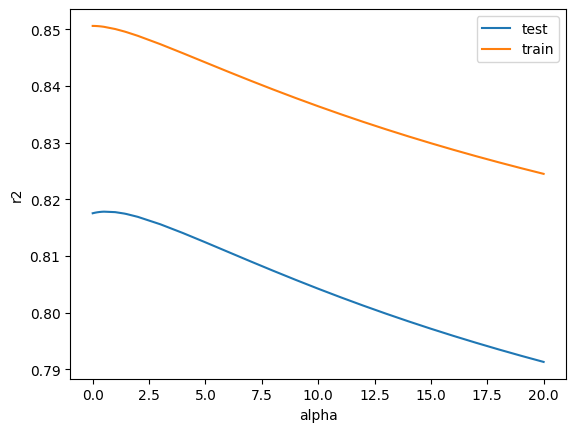

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.legend(['test', 'train'])
plt.show()


- Lasso

In [ ]:
# applying Lasso Regualization (L-2)

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
print( r2_score(y_test, y_pred) )
lasso.coef_



0.3124312564557964


array([ 0.        ,  0.        ,  0.        ,  3.03960905,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ])

In [ ]:
from sklearn.model_selection import GridSearchCV

param = {'alpha':  [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.4, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

lasso = Lasso()
chunks = KFold(n_splits=10, shuffle=True, random_state=100)

model = GridSearchCV(
    estimator=Lasso(),
    param_grid=param,
    scoring='r2',
    cv=chunks,
    return_train_score=True
)

model.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.4,
                                   1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                   14, 15, 16, 17, 18, 19, 20]},
             return_train_score=True, scoring='r2')

In [ ]:
model.best_params_

{'alpha': 0.01}

In [ ]:
model.best_estimator_

Lasso(alpha=0.01)

In [ ]:
model.best_score_


np.float64(0.8180529182760232)

In [ ]:
import pandas as pd
cv_results = pd.DataFrame(model.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004245,0.000918,0.001783,0.000320,0.001,{'alpha': 0.001},0.656828,0.846655,0.874537,0.859105,...,0.846802,0.848221,0.849573,0.854066,0.849011,0.837904,0.854817,0.860695,0.850606,0.006086
1,0.003783,0.000253,0.001609,0.000090,0.010,{'alpha': 0.01},0.659971,0.842843,0.876542,0.858153,...,0.846496,0.847912,0.849199,0.853771,0.848698,0.837550,0.854512,0.860340,0.850282,0.006093
2,0.002575,0.000181,0.001390,0.000128,0.100,{'alpha': 0.1},0.649765,0.799960,0.876372,0.837496,...,0.827373,0.829525,0.830579,0.834075,0.827634,0.818541,0.836439,0.841007,0.831208,0.006060
3,0.002170,0.000164,0.001261,0.000038,0.200,{'alpha': 0.2},0.620111,0.791041,0.876162,0.819126,...,0.811903,0.814774,0.814365,0.820590,0.812628,0.804794,0.822769,0.826544,0.816804,0.006106
4,0.002190,0.000167,0.001373,0.000199,0.300,{'alpha': 0.3},0.570258,0.778383,0.862898,0.800026,...,0.795933,0.799784,0.798457,0.805361,0.797943,0.788583,0.807727,0.811236,0.801473,0.006441
5,0.002085,0.000046,0.001335,0.000151,0.400,{'alpha': 0.4},0.520129,0.769148,0.840344,0.781381,...,0.776983,0.783191,0.779516,0.787308,0.780433,0.771682,0.793125,0.791739,0.784096,0.006745
6,0.002224,0.000259,0.001354,0.000103,0.500,{'alpha': 0.5},0.512665,0.764997,0.836840,0.776754,...,0.773043,0.778536,0.772153,0.781630,0.773885,0.762581,0.790951,0.786119,0.778607,0.008296
7,0.002063,0.000063,0.001282,0.000035,1.000,{'alpha': 1},0.473789,0.752861,0.821566,0.763582,...,0.758162,0.763483,0.756132,0.765106,0.758510,0.747263,0.778545,0.774604,0.764327,0.009426
8,0.002611,0.000642,0.001693,0.000413,1.400,{'alpha': 1.4},0.475658,0.757089,0.820694,0.763319,...,0.757916,0.763234,0.753213,0.763028,0.758190,0.747002,0.778284,0.774339,0.763612,0.009687
9,0.002037,0.000049,0.001267,0.000031,1.500,{'alpha': 1.5},0.476104,0.758114,0.820465,0.763245,...,0.757841,0.763159,0.753136,0.762947,0.758115,0.746924,0.778205,0.774259,0.763533,0.009687


In [ ]:
cv_results[['param_alpha', 'mean_test_score', 'mean_train_score']]


,param_alpha,mean_test_score,mean_train_score
0,0.001,0.817649,0.850606
1,0.010,0.818053,0.850282
2,0.100,0.800872,0.831208
3,0.200,0.789674,0.816804
4,0.300,0.771637,0.801473
5,0.400,0.752497,0.784096
6,0.500,0.748226,0.778607
7,1.000,0.731834,0.764327
8,1.400,0.731626,0.763612
9,1.500,0.731580,0.763533


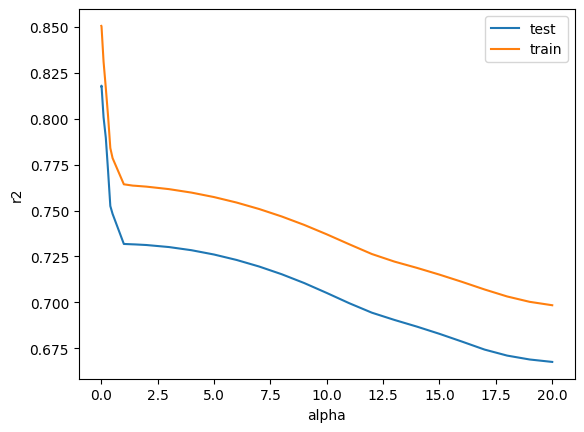

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.legend(['test', 'train'])
plt.show()


- ElasticNet

In [ ]:
# applying ElasticNet Regualization

from sklearn.linear_model import ElasticNet
elasticNet = ElasticNet(alpha=10)
elasticNet.fit(X_train, y_train)

y_pred = elasticNet.predict(X_test)
print( r2_score(y_test, y_pred) )
elasticNet.coef_


0.17988942899147087


array([ 0.        ,  0.        ,  0.47135502,  1.27536966,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ])

In [ ]:
# Applying 'Grid Search CV' method
from sklearn.model_selection import GridSearchCV

param = {'alpha':  [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.4, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

elasticNet = ElasticNet()
chunks = KFold(n_splits=10, shuffle=True, random_state=100)


model = GridSearchCV(
    estimator=ElasticNet(),
    param_grid=param,
    scoring='r2',
    cv=chunks,
    return_train_score=True
)

model.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.4,
                                   1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                   14, 15, 16, 17, 18, 19, 20]},
             return_train_score=True, scoring='r2')

In [ ]:
model.best_params_

{'alpha': 0.001}

In [ ]:
model.best_estimator_

ElasticNet(alpha=0.001)

In [ ]:
model.best_score_


np.float64(0.8177873441155995)

In [ ]:
import pandas as pd
cv_results = pd.DataFrame(model.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004463,0.000658,0.001640,0.000148,0.001,{'alpha': 0.001},0.657858,0.845354,0.875717,0.858962,...,0.846747,0.848170,0.849518,0.854013,0.848950,0.837851,0.854764,0.860646,0.850552,0.006086
1,0.003487,0.000175,0.001507,0.000306,0.010,{'alpha': 0.01},0.659344,0.831426,0.882135,0.854820,...,0.843425,0.845055,0.846203,0.850768,0.845421,0.834625,0.851705,0.857552,0.847341,0.006128
2,0.002744,0.000313,0.001414,0.000132,0.100,{'alpha': 0.1},0.590497,0.780710,0.865604,0.816471,...,0.807008,0.810461,0.809191,0.815488,0.808714,0.797946,0.820230,0.822027,0.812350,0.007008
3,0.002302,0.000083,0.001249,0.000029,0.200,{'alpha': 0.2},0.549788,0.766780,0.849342,0.795855,...,0.789258,0.793092,0.789948,0.797361,0.790506,0.779489,0.804884,0.804176,0.794827,0.007693
4,0.002274,0.000138,0.001327,0.000110,0.300,{'alpha': 0.3},0.527593,0.761027,0.840527,0.784675,...,0.779724,0.783888,0.779148,0.787316,0.780599,0.769528,0.796551,0.794333,0.785222,0.008055
5,0.002289,0.000211,0.001447,0.000401,0.400,{'alpha': 0.4},0.512073,0.759315,0.835541,0.777810,...,0.773537,0.778141,0.772043,0.781264,0.774217,0.763267,0.791553,0.788058,0.779175,0.008370
6,0.002203,0.000185,0.001313,0.000105,0.500,{'alpha': 0.5},0.502572,0.758740,0.833566,0.774654,...,0.770454,0.775257,0.768326,0.778044,0.770596,0.759375,0.788950,0.784116,0.775833,0.008614
7,0.001984,0.000053,0.001242,0.000092,1.000,{'alpha': 1},0.486469,0.758317,0.826817,0.768059,...,0.763318,0.768645,0.759948,0.769626,0.763769,0.752395,0.782677,0.778433,0.768888,0.009126
8,0.002070,0.000253,0.001290,0.000162,1.400,{'alpha': 1.4},0.480531,0.759438,0.823363,0.765321,...,0.760440,0.765758,0.756647,0.766327,0.760861,0.749469,0.780092,0.775905,0.766022,0.009298
9,0.002020,0.000166,0.001395,0.000417,1.500,{'alpha': 1.5},0.479482,0.759867,0.822639,0.764772,...,0.759864,0.765179,0.755985,0.765671,0.760271,0.748882,0.779573,0.775395,0.765446,0.009333


In [ ]:
cv_results[['param_alpha', 'mean_test_score', 'mean_train_score']]


,param_alpha,mean_test_score,mean_train_score
0,0.001,0.817787,0.850552
1,0.010,0.815686,0.847341
2,0.100,0.779531,0.812350
3,0.200,0.761555,0.794827
4,0.300,0.752224,0.785222
5,0.400,0.746910,0.779175
6,0.500,0.744257,0.775833
7,1.000,0.737446,0.768888
8,1.400,0.734308,0.766022
9,1.500,0.733693,0.765446


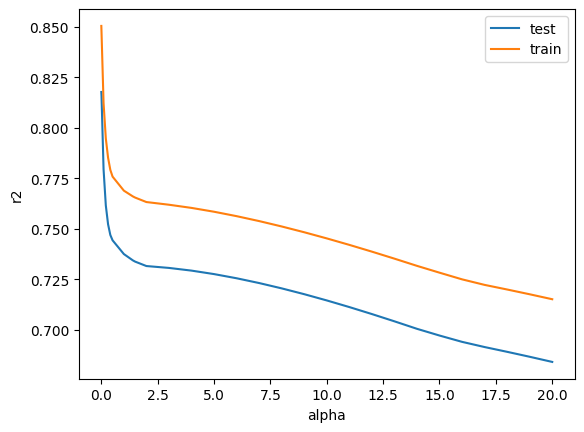

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.legend(['test', 'train'])
plt.show()




# RandomForest

> Train our data with a Reandom Forest model.



Random Forest Model Performance:
R2 Score: 0.6876
MAE: 5.1750
MSE: 82.4899


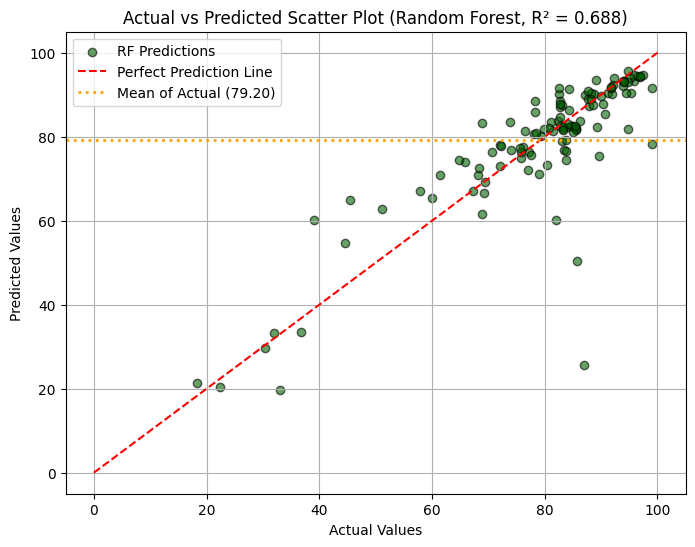

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest Model Performance:")
print(f"R2 Score: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='darkgreen', alpha=0.6, edgecolor='k', label='RF Predictions')
plt.plot([0, 100], [0, 100], 'r--', label='Perfect Prediction Line')

mean_actual = np.mean(y_test)
plt.axhline(y=mean_actual, color='orange', linestyle=':', linewidth=2, label=f'Mean of Actual ({mean_actual:.2f})')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Scatter Plot (Random Forest, R² = {r2_rf:.3f})')
plt.legend()
plt.grid(True)
plt.show()

# LightGBM and XGBoost


> Training out data with XGBoost and LightGBM



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gbr = GradientBoostingRegressor(random_state=42)
xgbr = xgb.XGBRegressor(random_state=42)
lgbmr = lgb.LGBMRegressor(random_state=42)

def evaluate_boosting_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R2: {r2:.4f}")
    print("-" * 40)
    return model, mae, mse, r2

X_test_rfe = X_test_rfe.drop(columns='Batch_Number_B5')
X_test_rfe = X_test_rfe.drop(columns='Batch_Number_B4')


gbr_model, mae_gbr, mse_gbr, r2_gbr = evaluate_boosting_model(
    "Gradient Boosting Regression", gbr, X_train_rfe, X_test_rfe, y_train, y_test
)
xgbr_model, mae_xgbr, mse_xgbr, r2_xgbr = evaluate_boosting_model(
    "XGBoost Regression", xgbr, X_train_rfe, X_test_rfe, y_train, y_test
)
lgbmr_model, mae_lgbmr, mse_lgbmr, r2_lgbmr = evaluate_boosting_model(
    "LightGBM Regression", lgbmr, X_train_rfe, X_test_rfe, y_train, y_test
)

import pandas as pd

boosting_results = pd.DataFrame({
    'Model': ['Gradient Boosting', 'XGBoost', 'LightGBM'],
    'MAE': [mae_gbr, mae_xgbr, mae_lgbmr],
    'MSE': [mse_gbr, mse_xgbr, mse_lgbmr],
    'R2': [r2_gbr, r2_xgbr, r2_lgbmr]
})

print("\nBoosting Model Comparison Summary:")
print(boosting_results)

Gradient Boosting Regression Performance:
MAE: 5.5691
MSE: 83.3569
R2: 0.6843
----------------------------------------
XGBoost Regression Performance:
MAE: 6.1577
MSE: 105.1395
R2: 0.6018
----------------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 323
[LightGBM] [Info] Number of data points in the train set: 464, number of used features: 9
[LightGBM] [Info] Start training from score 78.895582
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

# Comparing all the three models with a scatter plot


> We will see how well the above three models have performed comparing each of them with their respective r2 core, their predicted v/s actual outputs and the perfect prediction line



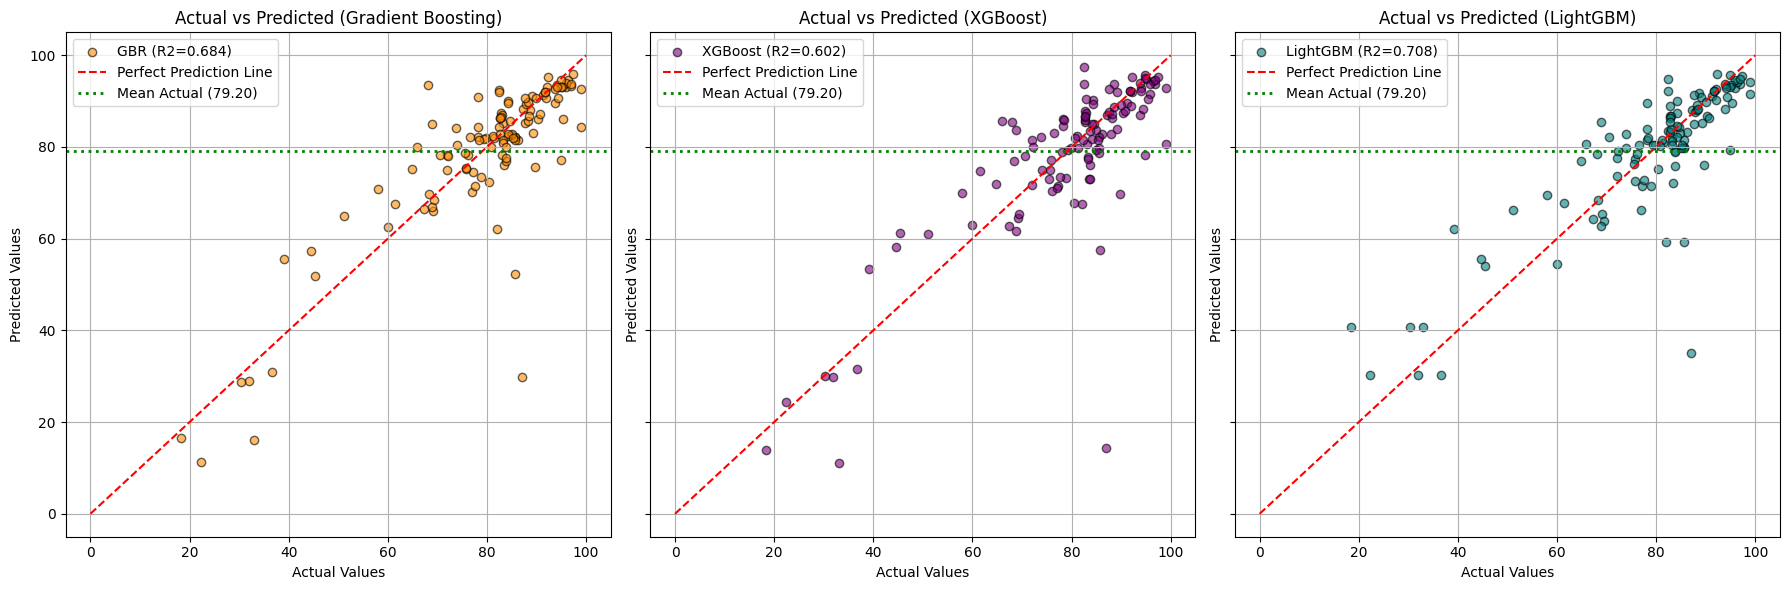


Boosting Model Comparison Summary:
               Model       MAE         MSE        R2
0  Gradient Boosting  5.569124   83.356889  0.684279
1            XGBoost  6.157746  105.139541  0.601775
2           LightGBM  5.597099   77.073244  0.708079


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Gradient Boosting Plot
axes[0].scatter(y_test, gbr_model.predict(X_test_rfe), color='darkorange', alpha=0.6, edgecolor='k', label=f'GBR (R2={r2_gbr:.3f})')
axes[0].plot([0, 100], [0, 100], 'r--', label='Perfect Prediction Line')
axes[0].axhline(y=np.mean(y_test), color='green', linestyle=':', linewidth=2, label=f'Mean Actual ({np.mean(y_test):.2f})')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Actual vs Predicted (Gradient Boosting)')
axes[0].legend()
axes[0].grid(True)

# XGBoost Plot
axes[1].scatter(y_test, xgbr_model.predict(X_test_rfe), color='purple', alpha=0.6, edgecolor='k', label=f'XGBoost (R2={r2_xgbr:.3f})')
axes[1].plot([0, 100], [0, 100], 'r--', label='Perfect Prediction Line')
axes[1].axhline(y=np.mean(y_test), color='green', linestyle=':', linewidth=2, label=f'Mean Actual ({np.mean(y_test):.2f})')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title('Actual vs Predicted (XGBoost)')
axes[1].legend()
axes[1].grid(True)

# LightGBM Plot
axes[2].scatter(y_test, lgbmr_model.predict(X_test_rfe), color='teal', alpha=0.6, edgecolor='k', label=f'LightGBM (R2={r2_lgbmr:.3f})')
axes[2].plot([0, 100], [0, 100], 'r--', label='Perfect Prediction Line')
axes[2].axhline(y=np.mean(y_test), color='green', linestyle=':', linewidth=2, label=f'Mean Actual ({np.mean(y_test):.2f})')
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predicted Values')
axes[2].set_title('Actual vs Predicted (LightGBM)')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

print("\nBoosting Model Comparison Summary:")
print(boosting_results)

**Comparing R2 Score, MSE and MAE of all the models we have trained fr and see for ourselves, which one is the most accurate**

/tmp/ipython-input-1575767503.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=results_sorted_r2, palette='viridis')


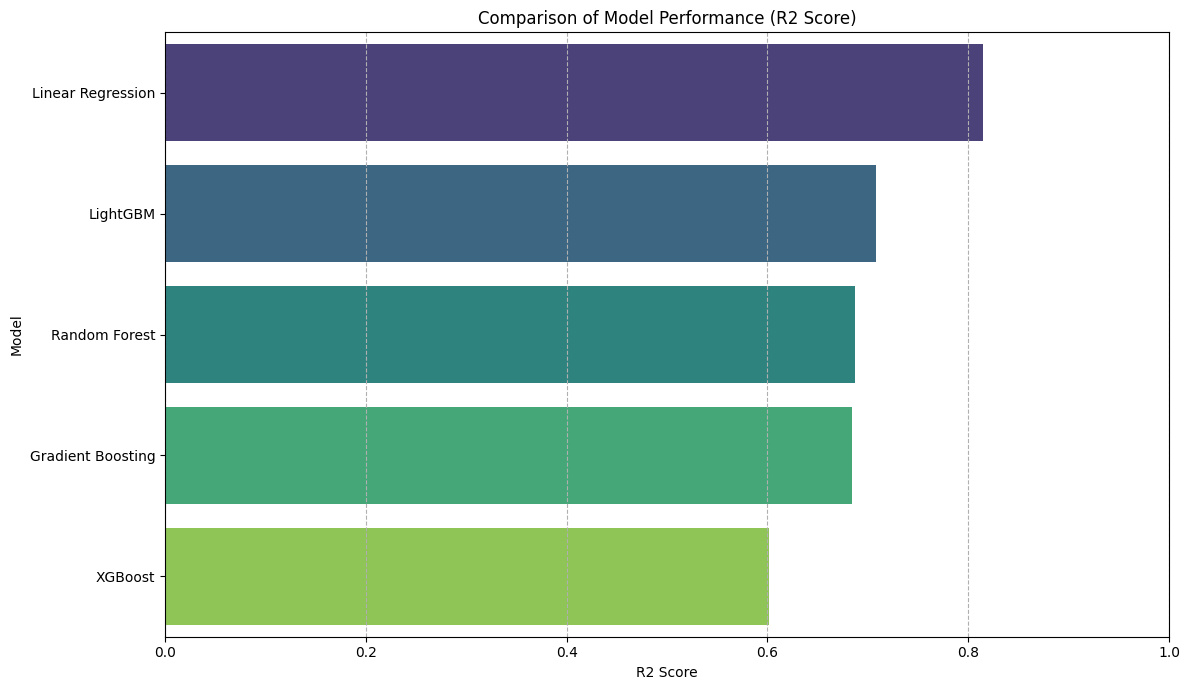

/tmp/ipython-input-1575767503.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=results_sorted_mae, palette='magma')


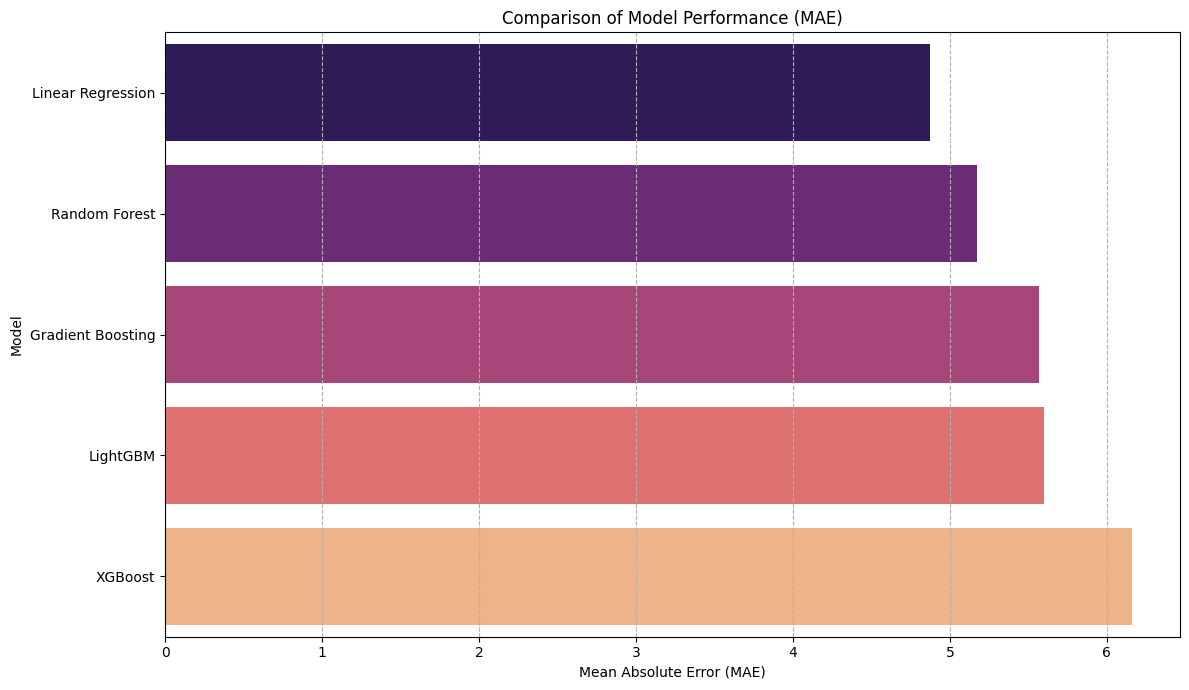

/tmp/ipython-input-1575767503.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSE', y='Model', data=results_sorted_mse, palette='plasma')


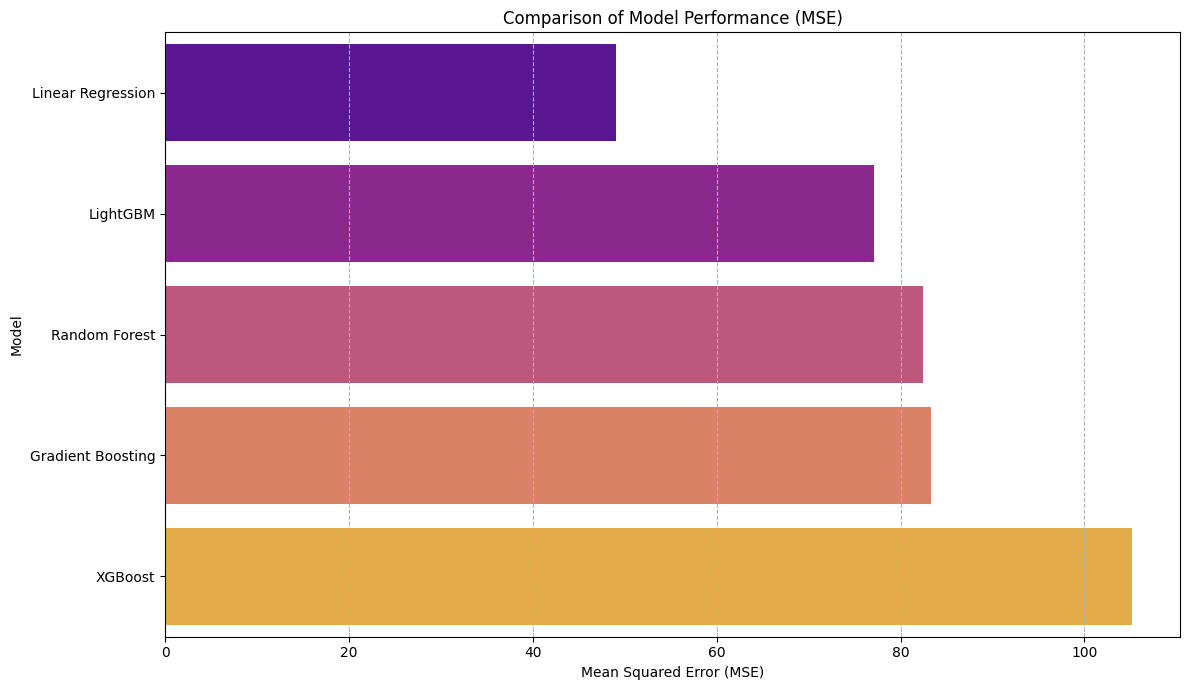

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_r2_scores = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM'],
    'R2': [r2, r2_rf, r2_gbr, r2_xgbr, r2_lgbmr]
})

results_sorted_r2 = model_r2_scores.sort_values(by='R2', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='R2', y='Model', data=results_sorted_r2, palette='viridis')
plt.title('Comparison of Model Performance (R2 Score)')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.xlim(0, 1) #
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


# MAE (lower is better):
# Creating a DataFrame to store MAE scores
model_mae_scores = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM'],
    'MAE': [mae, mae_rf, mae_gbr, mae_xgbr, mae_lgbmr]
})
results_sorted_mae = model_mae_scores.sort_values(by='MAE', ascending=True)

plt.figure(figsize=(12, 7))
sns.barplot(x='MAE', y='Model', data=results_sorted_mae, palette='magma')
plt.title('Comparison of Model Performance (MAE)')
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

#MSE (lower is better):
# Creating a DataFrame to store MSE scores
model_mse_scores = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM'],
    'MSE': [mse, mse_rf, mse_gbr, mse_xgbr, mse_lgbmr]
})
results_sorted_mse = model_mse_scores.sort_values(by='MSE', ascending=True)

plt.figure(figsize=(12, 7))
sns.barplot(x='MSE', y='Model', data=results_sorted_mse, palette='plasma')
plt.title('Comparison of Model Performance (MSE)')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()